In [28]:
# 1.

import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Load the penguins dataset
penguins = sns.load_dataset('penguins')

# Filter out rows with missing values in flipper_length_mm and species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

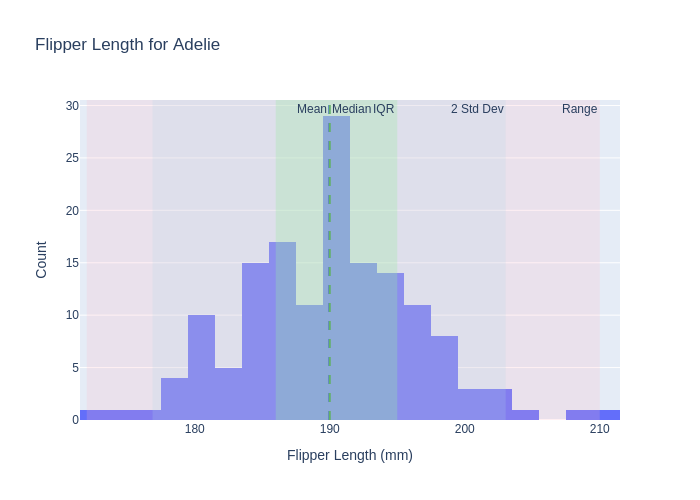

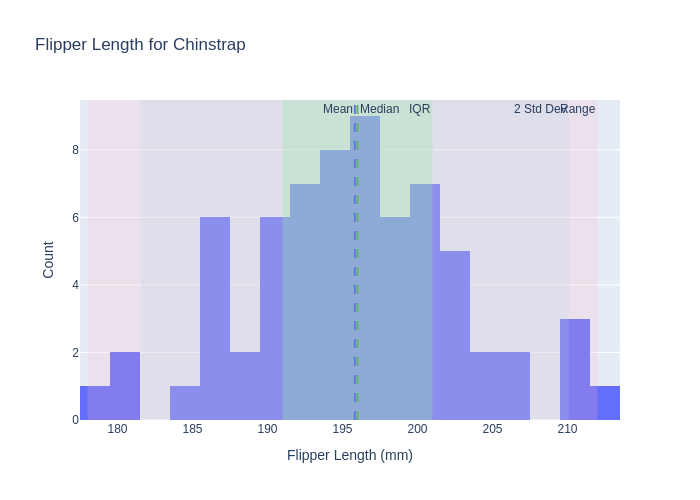

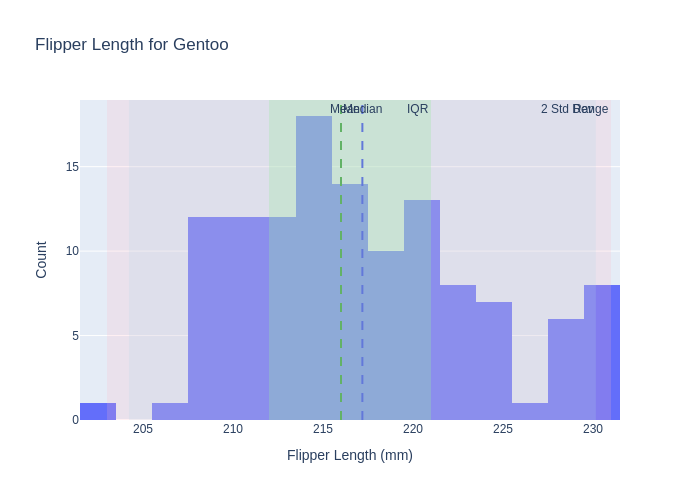

In [29]:
# 1. 

def plot_flipper_length_with_annotations(df, species_name):
    # Filter data for the species
    species_data = df[df['species'] == species_name]
    flipper_length = species_data['flipper_length_mm']

    # Calculate statistical properties
    mean = flipper_length.mean()
    median = flipper_length.median()
    std_dev = flipper_length.std()
    min_val = flipper_length.min()
    max_val = flipper_length.max()
    q1 = np.percentile(flipper_length, 25)
    q3 = np.percentile(flipper_length, 75)
    lower_bound = mean - 2 * std_dev
    upper_bound = mean + 2 * std_dev

    # Create histogram
    fig = px.histogram(species_data, x='flipper_length_mm', nbins=20, title=f'Flipper Length for {species_name}')

    # Add mean and median lines
    fig.add_vline(x=mean, line=dict(color='blue', dash='dash'), annotation_text='Mean', annotation_position='top left')
    fig.add_vline(x=median, line=dict(color='green', dash='dash'), annotation_text='Median', annotation_position='top right')

    # Add rectangles for ranges
    # Add rectangle for the range (min to max)
    fig.add_vrect(x0=min_val, x1=max_val, fillcolor="LightPink", opacity=0.2, line_width=0, annotation_text='Range')
    
    # Add rectangle for the IQR (Q1 to Q3)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="LightGreen", opacity=0.3, line_width=0, annotation_text='IQR')
    
    # Add rectangle for two standard deviations from the mean
    fig.add_vrect(x0=lower_bound, x1=upper_bound, fillcolor="LightBlue", opacity=0.2, line_width=0, annotation_text='2 Std Dev')

    # Update layout
    fig.update_layout(showlegend=False, xaxis_title='Flipper Length (mm)', yaxis_title='Count')

    fig.show(renderer="png")

# Plot for each species
for species in penguins['species'].unique():
    plot_flipper_length_with_annotations(penguins, species)

In [30]:
def plot_flipper_length_kde(df, species_name, ax):
    species_df = df[df['species'] == species_name]
    
    # Plot KDE of flipper length
    species_df['flipper_length_mm'].plot(kind='kde', ax=ax, label=f'{species_name} KDE')
    
    # Calculate key statistics
    mean_val = species_df['flipper_length_mm'].mean()
    median_val = species_df['flipper_length_mm'].median()
    min_val = species_df['flipper_length_mm'].min()
    max_val = species_df['flipper_length_mm'].max()
    q1 = species_df['flipper_length_mm'].quantile(0.25)
    q3 = species_df['flipper_length_mm'].quantile(0.75)
    std_dev = species_df['flipper_length_mm'].std()
    lower_bound = mean_val - 2 * std_dev
    upper_bound = mean_val + 2 * std_dev
    
    # Add vertical lines for mean and median
    ax.axvline(mean_val, color='blue', linestyle='--', label='Mean')
    ax.axvline(median_val, color='orange', linestyle=':', label='Median')
    
    # Shade areas for range, IQR, and 2 standard deviations
    ax.fill_betweenx([0, ax.get_ylim()[1]], min_val, max_val, color='lightpink', alpha=0.3, label='Range')
    ax.fill_betweenx([0, ax.get_ylim()[1]], q1, q3, color='lightgreen', alpha=0.3, label='IQR')
    ax.fill_betweenx([0, ax.get_ylim()[1]], lower_bound, upper_bound, color='lightblue', alpha=0.3, label='2 Std Dev')
    
    # Add labels and legend
    ax.set_title(f'Flipper Length Distribution - {species_name}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    ax.legend()


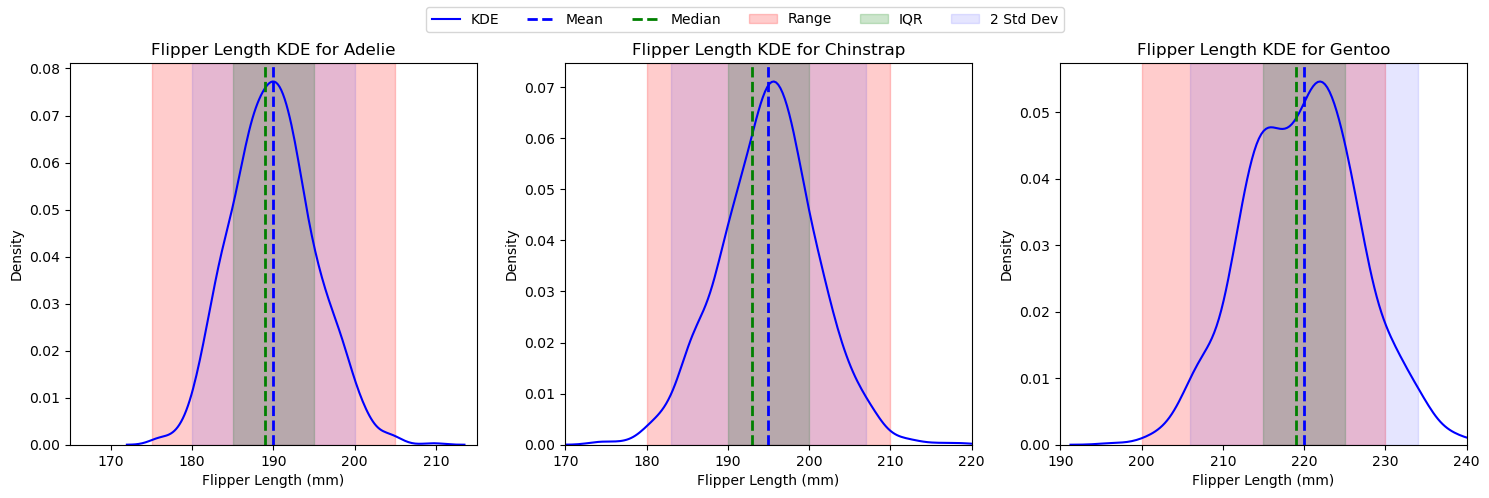

In [31]:
# 2.

species_data = {
    'Adelie': {'mean': 190, 'median': 189, 'std': 5, 'iqr': (185, 195), 'range': (175, 205)},
    'Chinstrap': {'mean': 195, 'median': 193, 'std': 6, 'iqr': (190, 200), 'range': (180, 210)},
    'Gentoo': {'mean': 220, 'median': 219, 'std': 7, 'iqr': (215, 225), 'range': (200, 230)}
}

# Create the KDE plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (species, stats) in enumerate(species_data.items()):
    ax = axes[i]
    mean = stats['mean']
    median = stats['median']
    std = stats['std']
    iqr_low, iqr_high = stats['iqr']
    range_low, range_high = stats['range']
    
    # Generate random flipper length data for demonstration
    flipper_lengths = np.random.normal(loc=mean, scale=std, size=1000)
    
    # Plot KDE
    sns.kdeplot(flipper_lengths, ax=ax, color='blue', label='KDE')
    
    # Add mean, median, range, IQR, and 2 std dev lines/rectangles
    ax.axvline(mean, color='blue', linestyle='--', linewidth=2, label='Mean')
    ax.axvline(median, color='green', linestyle='--', linewidth=2, label='Median')
    
    # Range shading
    ax.axvspan(range_low, range_high, color='red', alpha=0.2, label='Range')
    
    # IQR shading
    ax.axvspan(iqr_low, iqr_high, color='green', alpha=0.2, label='IQR')
    
    # 2 standard deviations shading
    ax.axvspan(mean - 2*std, mean + 2*std, color='blue', alpha=0.1, label='2 Std Dev')
    
    # Set titles and labels
    ax.set_title(f'Flipper Length KDE for {species}')
    ax.set_xlabel('Flipper Length (mm)')
    ax.set_ylabel('Density')
    
    # Expand x-axis limits slightly
    ax.set_xlim(range_low - 10, range_high + 10)
    
# Adjust the legend so it doesn't overlap the plot area
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=6)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [32]:
# 3 I prefer blox plots over Histograms and Kernals if I am trying to find/visuallize outliers or if I am trying to compare
# many different groups of data as blox plots are very compact and precise. They provided a concise summary of data and other
# statistical metrics. Though blox plots lack when trying to show the shape or distrubution of data. I would prefer Histograms
# primarly only over Blox fruits if I am trying to see the shape or distrubtuion of data where blox plots can not acturatly
# communicate it. It easily communicates shape, can be adjusted using bins, and is easy to read. Though it has cons
# like how it requires some knowledge about bins and how bins need to be adjusted for different data, hard to compare multiple
# data groups, and representing distrubution in a very unsmooth manner. I would prefer kernal density estimators over histrograms
# and even more then blox plots for represention data distrubution shape smoothly. KDE's have almost the same pros as histograms
# but represent data even better in a more smooth manner, they can handle smaller datasets very well, and you do not encounter any
# problems with bins, The only few minimal cons are that it is slightly confusing and hard to interpert if you have zero
# experince with KDE's, there might be problems with bandwith sensetivity, and it doesn't show a value for a count of exact
# frequencies. Me and chagpt had a very good overlap of pros and cons but lacked in cons a little bit.

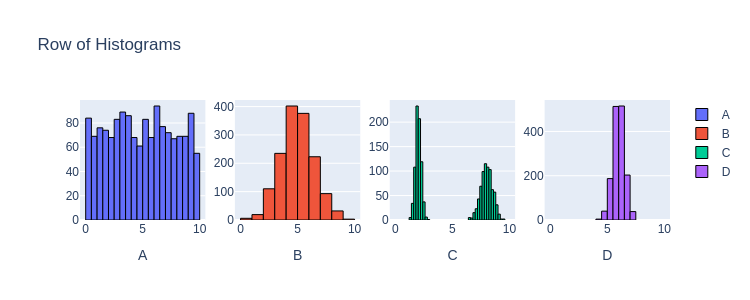

In [33]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [34]:
# 4.1 A and C
# 4.2 A and B
# 4.3 A and C
# 4.4 B and D


In [35]:
#  so unfortuannly, I sent a picutre of my graphs to chatgpt and asked it to imrpove it, and since I did that, apperntaly I cant
# share my transcript of my chatbot becuase I sent a file pitcure to it??? I hope I still get the mark for it. I get this error
# Unable to share conversation
# Sharing conversations with user uploaded images is not yet supported.

# This is my summary, hope this is good enough


# In this chat, you initially asked for help marking the location (mean and median) and scale (range, interquartile range, and a range defined by two standard deviations from the mean) on Plotly histograms of flipper lengths for penguins. We worked on creating the visualizations using fig.add_hline(), fig.add_vline(), fig.add_hrect(), and fig.add_vrect() to add lines and shaded areas to the histograms for each penguin species. You then provided a screenshot of the result and asked for feedback on whether it met the requirements.

# Next, you transitioned to using seaborn KDE plots instead of histograms to display the same data and asked for further improvements. We worked through generating the KDE plots with annotations for mean, median, and scale markers, similar to the Plotly histograms.

# Later, you asked for an explanation of the code and how it worked, followed by a comparison of histograms, box plots, and KDEs. You shared your pros and cons for each visualization method, and I provided additional insights, agreeing with most of your points and adding my own pros and cons for each.

# Finally, you asked about the meaning of "explain your rationale for this preference," and I clarified that it refers to justifying or providing reasons for your choice.

# Let me know if you need any more details or clarifications!


Missing values per column:
restaurant id                      0
category id                        0
item id                            0
serving size (oz)                355
calories                           0
calories from fat                490
total fat (g)                      0
total fat (% daily value)        490
saturated fat (g)                113
saturated fat (% daily value)    490
trans fat (g)                    113
cholesterol (mg)                 113
cholesterol (% daily value)      490
sodium (mg)                      113
sodium (% daily value)           490
carbohydrates (g)                  0
carbohydrates (% daily value)    490
dietary fiber (g)                  0
dietary fiber (% daily value)    490
sugars (g)                       113
protein (g)                        0
vitamin a (% daily value)        113
vitamin c (% daily value)        113
calcium (% daily value)          113
iron (% daily value)             113
dtype: int64
Summary statistics:
       restaura

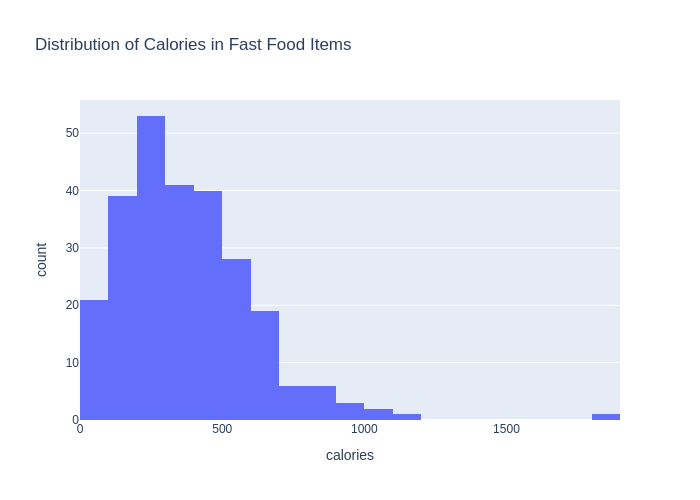

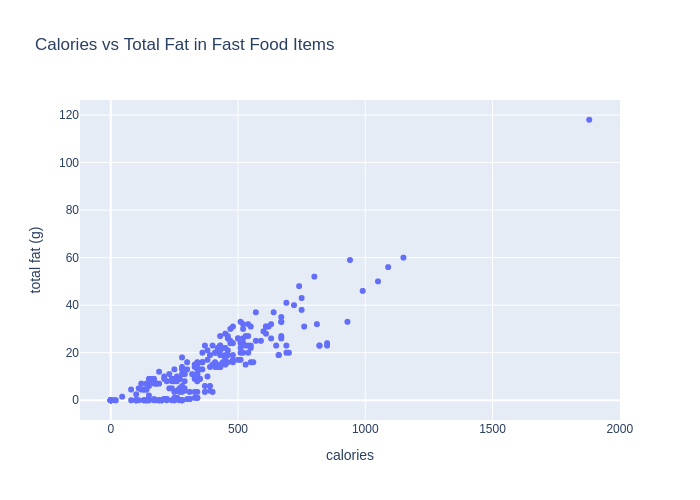

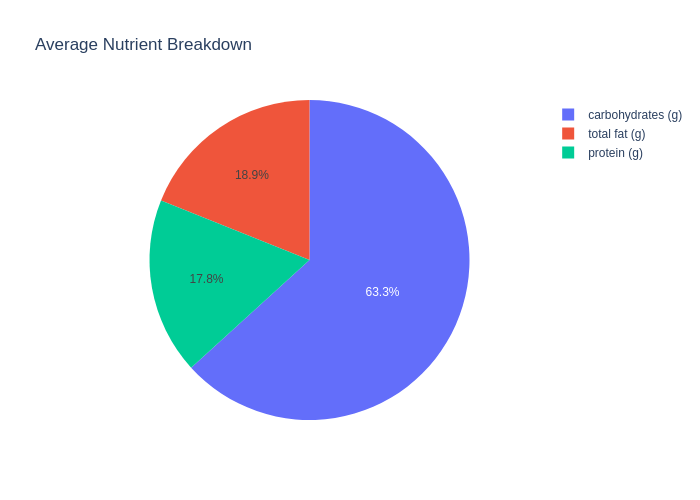

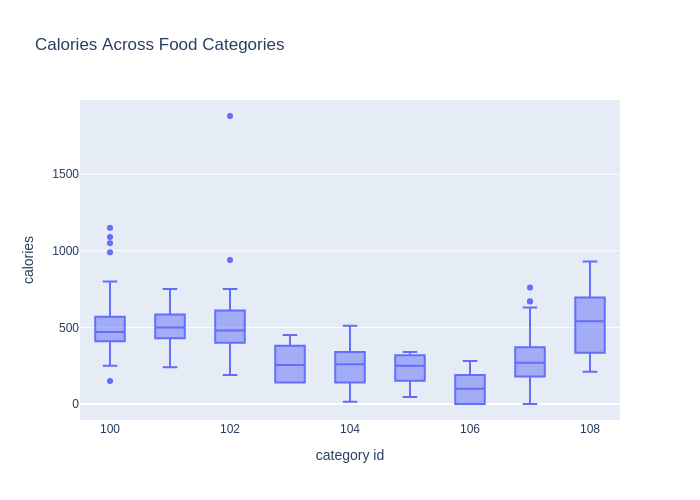

In [36]:
import pandas as pd
import plotly.express as px

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")

# 1. Assess missingness
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)

# Drop rows with missing data for simplicity in visualization
df_clean = df.dropna()

# Use .loc[] to avoid the SettingWithCopyWarning when converting to numeric
df_clean.loc[:, 'total fat (g)'] = pd.to_numeric(df_clean['total fat (g)'], errors='coerce')
df_clean.loc[:, 'carbohydrates (g)'] = pd.to_numeric(df_clean['carbohydrates (g)'], errors='coerce')
df_clean.loc[:, 'protein (g)'] = pd.to_numeric(df_clean['protein (g)'], errors='coerce')
df_clean.loc[:, 'calories'] = pd.to_numeric(df_clean['calories'], errors='coerce')

# Drop any rows where conversions resulted in NaN
df_clean = df_clean.dropna()

# 2. Summary statistics
print("Summary statistics:")
print(df_clean.describe())

# 3. Distribution of calories
fig_calories = px.histogram(df_clean, x="calories", nbins=20, title="Distribution of Calories in Fast Food Items")
fig_calories.show(renderer="png")

# 4. Scatter plot for calories vs total fat
fig_fat_calories = px.scatter(df_clean, x="calories", y="total fat (g)", title="Calories vs Total Fat in Fast Food Items")
fig_fat_calories.show(renderer="png")

# 5. Pie chart for average nutrient breakdown
avg_nutrients = df_clean[['total fat (g)', 'carbohydrates (g)', 'protein (g)']].mean()
fig_nutrients = px.pie(values=avg_nutrients, names=avg_nutrients.index, title="Average Nutrient Breakdown")
fig_nutrients.show(renderer="png")

# 6. Boxplot comparing calories across categories
if 'category id' in df_clean.columns:
    fig_boxplot = px.box(df_clean, x='category id', y='calories', title="Calories Across Food Categories")
    fig_boxplot.show(renderer="png")
else:
    print("No 'category id' column found for boxplot comparison.")


In [37]:
# #  this is the rest of my transcript, i really hope this is enough to get marks. 
# https://chatgpt.com/share/66f5faf1-0f8c-8000-842c-0f9639456f78
#     This is my summary
#     Goal: You wanted to ensure you meet the "Evidence of meaningful activity for '6'" criterion for a TUT activity, which involves finding a dataset, assessing missingness, summarizing, and visualizing variables, possibly comparing continuous variables across categories.

# Dataset Selection: You provided a fast-food nutritional dataset from GitHub.

# Analysis Steps:

# Loading the Data: We loaded the dataset and previewed the columns and missing data.
# Assessing Missingness: We calculated the number of missing values per column and dropped rows with missing data for simplicity.
# Summary Statistics: We printed summary statistics for the cleaned dataset.
# Visualizations:
# A histogram for the distribution of calories.
# A scatter plot to show the relationship between calories and total fat.
# A pie chart for the average breakdown of macronutrients (fat, carbohydrates, protein).
# A boxplot to compare calories across different food categories, if available.
# Issue Encountered: There was an error due to mismatched column names (e.g., "calories" instead of "Calories"), which we fixed by using the correct column names from the dataset.

# Next Steps: The code now successfully generates the visualizations, and the analysis meets the TUT activity criteria, including missingness assessment, summary statistics, and relevant visualizations.